Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow_decision_forests as tfdf


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv") # load training CSV file
train_data.head() # show first 5 rows from dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


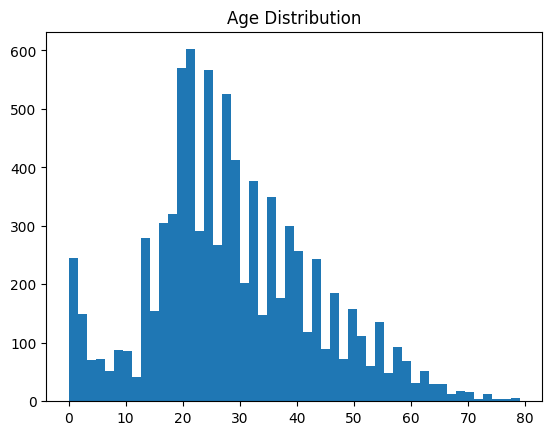

In [3]:


age_distribution = plt.hist(train_data['Age'], bins = 50)
plt.title('Age Distribution')
plt.show()

In [4]:
train_data = train_data.drop(['PassengerId', 'Name'], axis = 1)
train_data.head(0)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported


In [5]:
print(train_data.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [6]:
train_data.isnull().sum().sort_values(ascending=False) # number of missing values (NaN) in each column

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

Fill NaN's with 0's

In [7]:
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value = 0)
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

Convert booleans into 0's and 1's

In [8]:
train_data['Transported'] = train_data['Transported'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

Split the cabins into deck, cabin number, and dide

In [9]:
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)

Remove the Cabin column

In [10]:
train_data = train_data.drop('Cabin', axis=1)


In [11]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]
    
train_dataset_pd,valid_dataset_pd = split_dataset(train_data)
print("{} training, {} testing.".format(
    len(train_dataset_pd), len(valid_dataset_pd)))

6936 training, 1757 testing.


In [12]:
train_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataset_pd, label = 'Transported')
valid_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(valid_dataset_pd, label= 'Transported')

In [13]:
rf = tfdf.keras.RandomForestModel()


Use /tmp/tmpchnn1zmp as temporary training directory


In [14]:
rf.fit(x = train_data_tf)

Reading training dataset...
Training dataset read in 0:00:05.093224. Found 6936 examples.
Training model...
Model trained in 0:00:51.978727
Compiling model...
Model compiled.


In [15]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth = 3)

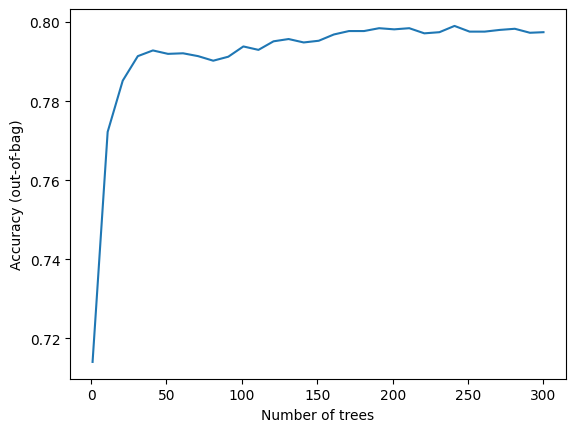

Evaluation(num_examples=6936, accuracy=0.7974336793540946, loss=0.5570032457002538, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [16]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

inspector = rf.make_inspector()
inspector.evaluation()

In [17]:
evaluation = rf.evaluate(x=valid_data_tf,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 71ms/step - loss: 0.0000e+00
loss: 0.0000


## Submission

In [18]:
# Load test dataset
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# Convert NaN values with zero because tfrf can't process missing boolean values
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value = 0)

# Convert booleans into 1's and 0's
test_data['VIP'] = test_data['VIP'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)

# Split Cabin into Deck, Cab_num, and Side
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)

# Remove Cabin
test_data = test_data.drop('Cabin', axis = 1)

# convert pandas dataframe to tensor flow dataset
test_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

# Predict
raw_preds = list(rf.predict(test_data_tf))
predictions = [bool(pred[0]) for pred in raw_preds]

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Transported": predictions
})
submission.to_csv("submission.csv", index=False)


print("Submission file saved!")
print(submission.head())
print("Done! Submission file saved.")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


5/5 [==============================] - 0s 71ms/step
Submission file saved!
  PassengerId  Transported
0     0013_01         True
1     0018_01         True
2     0019_01         True
3     0021_01         True
4     0023_01         True
Done! Submission file saved.
